In [ ]:
#6) Object detection using Transfer Learning of CNN architectures
a. Load in a pre-trained CNN model trained on a large dataset
b. Freeze parameters (weights) in model’s lower convolutional layers
c. Add custom classifier with several layers of trainable parameters to model
d. Train classifier layers on training data available for task
e. Fine-tune hyper parameters and unfreeze more layers as needed

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

Uploading Data via Kaggle Api

In [2]:
from google.colab import files
uploaded=files.upload()

Saving archive (5).zip to archive (5).zip


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d mohamedhanyyy/chest-ctscan-images

Dataset URL: https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images
License(s): ODbL-1.0
 89% 106M/119M [00:00<00:00, 144MB/s] 
100% 119M/119M [00:00<00:00, 143MB/s]


In [6]:

from zipfile import ZipFile
file_name = "chest-ctscan-images.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')



Done


In [7]:


#Give dataset path
train_path = '/content/Data/train'
test_path = '/content/Data/test'



In [8]:


#Give dataset path
train_path = '/content/Data/train'
test_path = '/content/Data/test'



In [9]:


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)




Designing Our Model

In [10]:


InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=4, activation='softmax')(x)
model = Model(InceptionV3_model.input, output)


model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 23,116,580 (88.18 MB)

 Trainable params: 1,708,676 (6.52 MB)

 Non-trainable params: 21,407,904 (81.66 MB)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#no flip and zoom for test datase

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
from tensorflow.keras.preprocessing.image import ImageDataGenerator



test_set = test_datagen.flow_from_directory(

    '/content/Data/test',

    target_size=(224, 224),

    batch_size=32,

    class_mode='categorical'

)





Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [14]:
# Compile the model

model.compile(

    loss='categorical_crossentropy',

    optimizer='adam',

    metrics=['accuracy']

)

Training Our Model

In [15]:
# fit the model
# Run the cell. It will take some time to execute
if test_set is None:

    print("test_set is None!")

else:
  r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=8,
  steps_per_epoch=len(training_set),
 )



Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 130s 6s/step - accuracy: 0.3704 - loss: 1.4876 - val_accuracy: 0.5397 - val_loss: 0.9484
Epoch 2/8


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5397 - val_loss: 0.9484
Epoch 3/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 110s 5s/step - accuracy: 0.6168 - loss: 0.8339 - val_accuracy: 0.6794 - val_loss: 0.8477
Epoch 4/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6794 - val_loss: 0.8477
Epoch 5/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 110s 5s/step - accuracy: 0.6308 - loss: 0.8167 - val_accuracy: 0.5619 - val_loss: 1.0513
Epoch 6/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5619 - val_loss: 1.0513
Epoch 7/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 174s 6s/step - accuracy: 0.7142 - loss: 0.6497 - val_accuracy: 0.6540 - val_loss: 0.7624
Epoch 8/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6540 - val_loss: 0.7624


In [27]:

loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])


In [28]:


# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#no flip and zoom for test datase



In [29]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 613 images belonging to 4 classes.


In [30]:
test_set = test_datagen.flow_from_directory('/content/Data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 315 images belonging to 4 classes.


Training Our Model

In [31]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=8,
  steps_per_epoch=len(training_set),
 )

Epoch 1/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 125s 6s/step - accuracy: 0.7290 - loss: 0.6337 - val_accuracy: 0.5778 - val_loss: 1.0445
Epoch 2/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5778 - val_loss: 1.0445
Epoch 3/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 110s 5s/step - accuracy: 0.8085 - loss: 0.4788 - val_accuracy: 0.7143 - val_loss: 0.7620
Epoch 4/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7143 - val_loss: 0.7620
Epoch 5/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 110s 5s/step - accuracy: 0.8701 - loss: 0.3508 - val_accuracy: 0.5175 - val_loss: 1.6195
Epoch 6/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5175 - val_loss: 1.6195
Epoch 7/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 115s 6s/step - accuracy: 0.8692 - loss: 0.3520 - val_accuracy: 0.7619 - val_loss: 0.6122
Epoch 8/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_

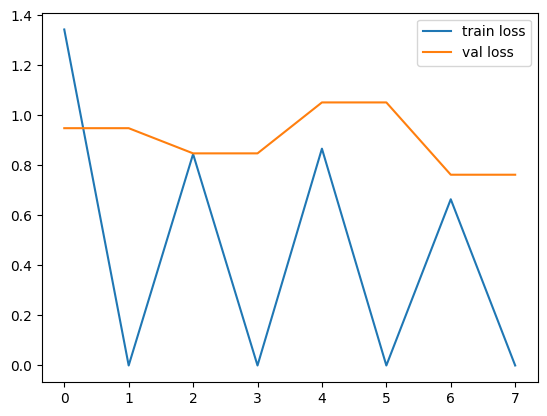

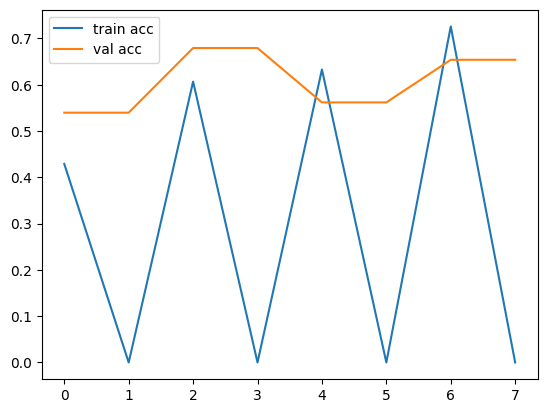

<Figure size 640x480 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
from tensorflow.keras.models import load_model

model.save('modelcancerlung.h5')

Making Predictions

In [18]:
y_pred = model.predict(test_set)

10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step


In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 2, 2, 0, 3, 3, 0, 0, 0, 3,
       3, 3, 0, 0, 2, 0, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 0, 0, 3, 3, 0,
       3, 0, 3, 0, 2, 0, 2, 0, 0, 0, 0, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3,
       0, 2, 3, 1, 3, 3, 0, 3, 2, 0, 3, 3, 1, 3, 0, 3, 0, 3, 0, 0, 2, 0,
       3, 3, 2, 1, 3, 0, 0, 3, 0, 3, 2, 3, 0, 0, 0, 2, 3, 1, 2, 3, 0, 0,
       3, 0, 2, 3, 0, 3, 3, 3, 2, 3, 2, 0, 3, 3, 0, 0, 1, 2, 3, 0, 3, 0,
       0, 3, 0, 0, 0, 3, 2, 2, 2, 0, 2, 3, 0, 3, 3, 3, 3, 3, 3, 1, 2, 0,
       2, 2, 0, 3, 2, 0, 2, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 2, 3,
       3, 3, 2, 0, 3, 2, 3, 2, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3,
       0, 0, 3, 3, 2, 0, 0, 3, 3, 0, 3, 3, 3, 0, 2, 3, 0, 3, 3, 2, 3, 3,
       2, 0, 0, 3, 2, 3, 2, 0, 0, 3, 3, 3, 3, 2, 0, 0, 2, 3, 3, 0, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 0, 0, 2, 3, 0, 3, 0,
       3, 0, 0, 2, 3, 2, 2, 2, 3, 2, 3, 3, 0, 3, 3, 2, 2, 3, 3, 2, 3, 0,
       3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,

In [20]:
classes = ["AdenocarcinomaChest Lung Cancer ","Large cell carcinoma Lung Cancer" , "NO Lung Cancer/ NORMAL" , "Squamous cell carcinoma Lung Cancer"]

In [21]:
def predict_image(img):
    plt.figure(figsize=(40,8))
    print()
    print('-----------------------------------Chest Cancer Type Detection---------------------------------------------------')
    print()
    print('----------------------------------------------RESULT-------------------------------------------------------------')
    print()
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    #img_data=preprocess_input(x)

    print(classes[np.argmax(model.predict(x))])


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
AdenocarcinomaChest Lung Cancer 


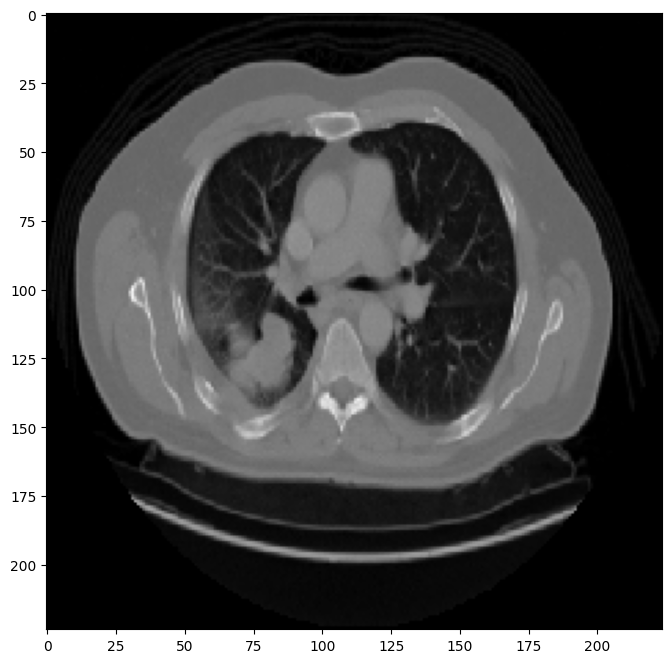

In [22]:
im=image.load_img('/content/Data/test/adenocarcinoma/000113 (7).png',target_size=(224,224))
predict_image(im)


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Squamous cell carcinoma Lung Cancer


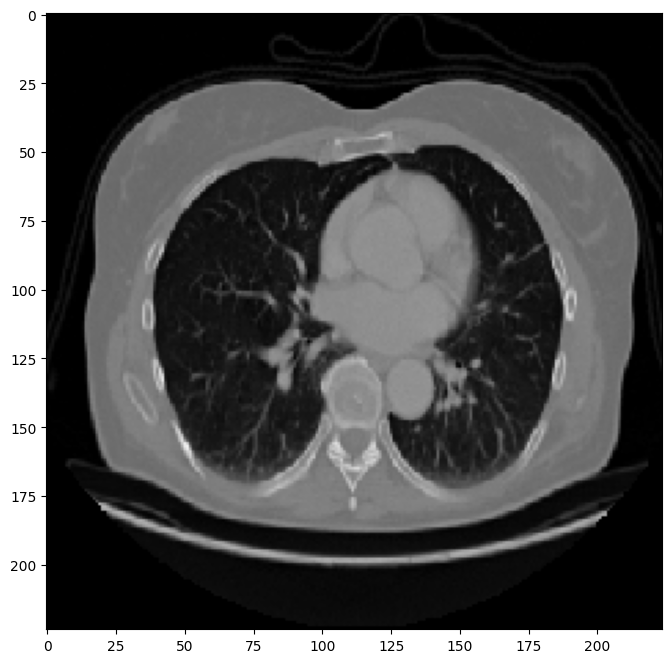

In [23]:
im2=image.load_img('/content/Data/test/large.cell.carcinoma/000111.png',target_size=(224,224))
predict_image(im2)


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Squamous cell carcinoma Lung Cancer


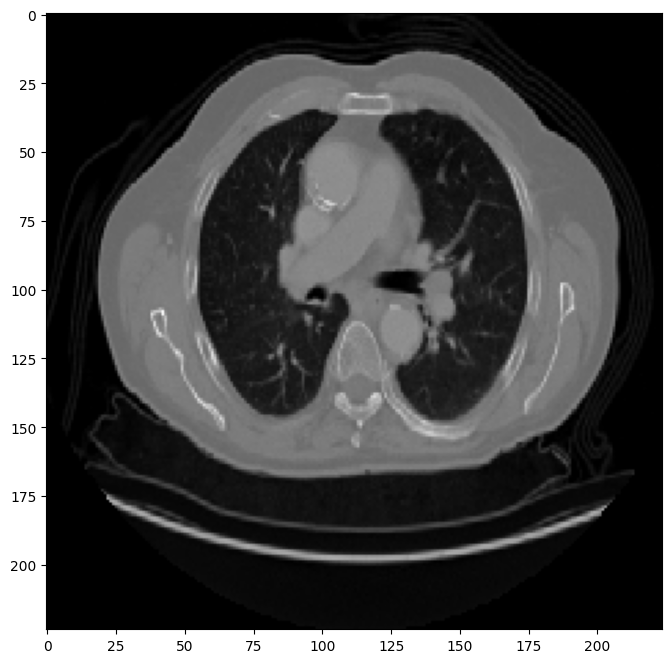

In [24]:
im3=image.load_img('/content/Data/test/squamous.cell.carcinoma/000112.png',target_size=(224,224))
predict_image(im3)


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Squamous cell carcinoma Lung Cancer


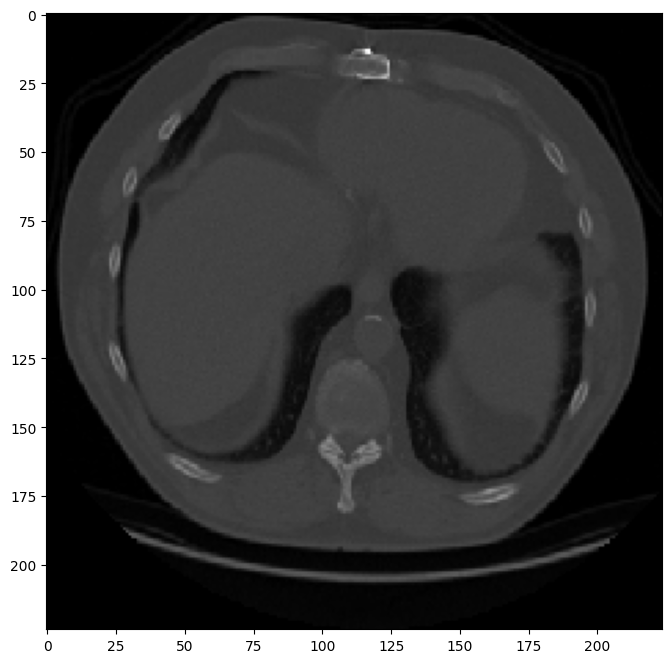

In [25]:
im4=image.load_img('/content/Data/test/squamous.cell.carcinoma/000118 (3).png',target_size=(224,224))
predict_image(im4)


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
NO Lung Cancer/ NORMAL


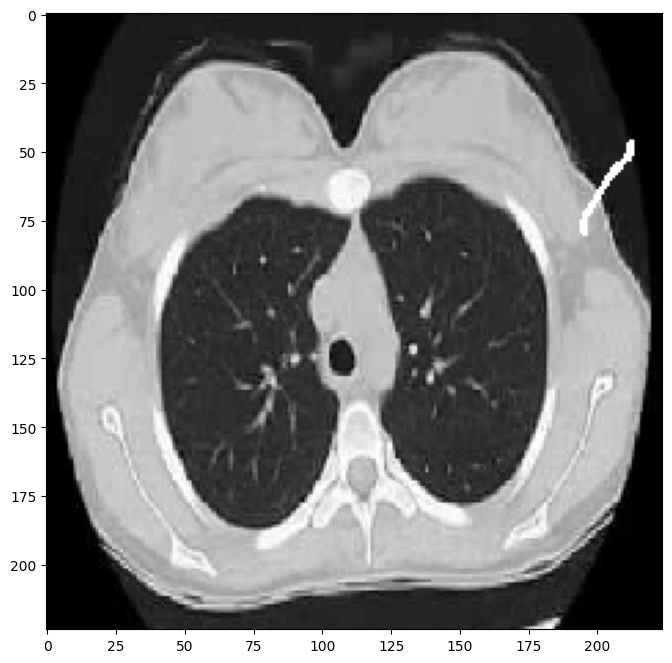

In [26]:
im5=image.load_img('/content/Data/test/normal/10 - Copy.png',target_size=(224,224))
predict_image(im5)